<a href="https://colab.research.google.com/github/SifulIslamTushar/AI-POC-contest-SRBD/blob/main/Object_detection_from_Video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#All imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import requests
import imageio
import os
from PIL import Image
from io import BytesIO

In [ ]:
# Load the TFLite model
# TFLite Model download page: https://tfhub.dev/tensorflow/lite-model/efficientdet/lite0/detection/metadata/1
# Model download link: https://tfhub.dev/tensorflow/lite-model/efficientdet/lite0/detection/metadata/1?lite-format=tflite
model_path = 'lite-model_efficientdet_lite0_detection_metadata_1.tflite'
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
# Path to the input video file
input_video_path = "/content/Ukraine.mp4"

# Directory to save the extracted frames
output_directory = "/content/Extracted_Frames/"

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

In [ ]:
# Open the video file
vid = imageio.get_reader(input_video_path, 'ffmpeg')

# Get frames per second (fps) of the video
fps = vid.get_meta_data()['fps']

# Calculate the frame interval for desired 6 frames per minute
frame_interval = int(round(fps * 10))

# Loop through the video frames and save frames at the calculated interval
frames = []
for i, frame in enumerate(vid):
    if i % frame_interval == 0:
        output_path = os.path.join(output_directory, f"frame_{i}.jpg")
        imageio.imwrite(output_path, frame)
        frames.append(output_path)
        # Display the image
        '''
        img = Image.open(output_path)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        print(f"frame_{i}.jpg")
        '''

# Close the video file
vid.close()

# Now you have the list of paths to the saved frames in the 'frames' list
print("Frames extracted and saved.")

Frames extracted and saved.


[320 320]
class_id:  1
class_id:  1
class_id:  1
class_id:  1
class_id:  1
class_id:  1
class_id:  1
Detected objects:  person (Confidence: 0.77)
Detected objects:  person (Confidence: 0.67)
Detected objects:  person (Confidence: 0.65)
Detected objects:  person (Confidence: 0.61)
Detected objects:  person (Confidence: 0.46)
Detected objects:  person (Confidence: 0.43)
Detected objects:  person (Confidence: 0.43)


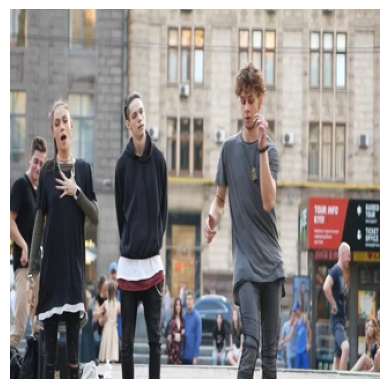

[320 320]
class_id:  1
class_id:  33
class_id:  1
class_id:  1
class_id:  1
class_id:  28
class_id:  1
class_id:  1
Detected objects:  person (Confidence: 0.65)
Detected objects:  suitcase (Confidence: 0.59)
Detected objects:  person (Confidence: 0.57)
Detected objects:  person (Confidence: 0.50)
Detected objects:  person (Confidence: 0.48)
Detected objects:  umbrella (Confidence: 0.43)
Detected objects:  person (Confidence: 0.41)
Detected objects:  person (Confidence: 0.41)


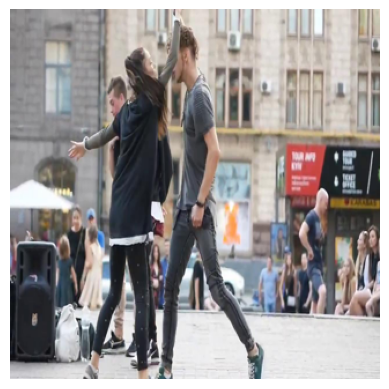

In [ ]:
for i in frames:
  image = Image.open(i)
  input_shape = input_details[0]['shape'][1:3]
  print(input_shape)
  # Resize and preprocess the image
  image = image.resize(input_shape)
  image = np.array(image, dtype=np.uint8)  # Convert to UINT8
  image = np.expand_dims(image, axis=0)
  #print the given image
  #plt.imshow(image[0])
  #plt.axis('off')
  #plt.show()

  interpreter.set_tensor(input_details[0]['index'], image)
  interpreter.invoke()

  #boxes = interpreter.get_tensor(output_details[0]['index'])
  classes = interpreter.get_tensor(output_details[1]['index'])
  scores = interpreter.get_tensor(output_details[2]['index'])
  num_detections = int(interpreter.get_tensor(output_details[3]['index']))

  threshold = 0.4  # Adjust this threshold as needed
  detected_objects = []

  class_names = [
      "person", "bicycle", "car", "motorcycle", "airplane",
      "bus", "train", "truck", "boat", "traffic light",
      "fire hydrant", "---", "stop sign", "parking meter", "bench",
      "bird", "cat", "dog", "horse", "sheep", "cow",
      "elephant", "bear", "zebra", "giraffe", "---", "backpack",
      "umbrella", "---", "---", "handbag", "tie", "suitcase", "frisbee",
      "skis", "snowboard", "sports ball", "kite", "baseball bat",
      "baseball glove", "skateboard", "surfboard", "tennis racket",
      "bottle", "---", "wine glass", "cup", "fork", "knife", "spoon",
      "bowl", "banana", "apple", "sandwich", "orange", "broccoli",
      "carrot", "hot dog", "pizza", "donut", "cake", "chair",
      "couch", "potted plant", "bed", "---",  "dining table", "---", "---",
      "toilet", "---", "tv", "laptop", "mouse", "remote", "keyboard", "cell phone",
      "microwave", "oven", "toaster", "sink", "refrigerator", "---", "book",
      "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush", "---"
  ]

  for k in range(num_detections):
      if scores[0, k] > threshold:
          class_id = int(classes[0, k])
          class_name = class_names[class_id]
          confidence = scores[0, k]
          #detected_objects.append(class_name)
          print("class_id: ", class_id+1)
          label = f"{class_name} (Confidence: {confidence:.2f})"
          detected_objects.append(label)

  # Print the detected object
  #print("Detected objects:", ', '.join(detected_objects))
  if not detected_objects:
    print("Nothing detected from this image")
  else:
    for object_label in detected_objects:
      print("Detected objects: ", object_label)

  # Display the image with detected object names
  plt.imshow(image[0])
  plt.axis('off')
  plt.show()